In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from PIL import Image
import urllib
import os

In [4]:
df = pd.read_csv('Arsenal squad 2122 playing time.csv', header=[1])
df

,Player,Nation,Pos,Age,MP,Min,Mn/MP,Min%,90s,Starts,...,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,Matches,-9999
0,Bukayo Saka,eng ENG,FWMF,19.0,38,2978.0,78.0,87.1,33.1,36,...,13.0,0.39,0.39,53.7,39.7,14.0,0.42,0.66,Matches,bc7dc64d
1,Gabriel Dos Santos,br BRA,DF,23.0,35,3063.0,88.0,89.6,34.0,35,...,24.0,0.71,3.48,57.4,36.7,20.8,0.61,2.61,Matches,67ac5bb8
2,Aaron Ramsdale,eng ENG,GK,23.0,34,3060.0,90.0,89.5,34.0,34,...,21.0,0.62,2.62,56.7,38.5,18.2,0.53,1.87,Matches,466fb2c5
3,Ben White,eng ENG,DF,23.0,32,2880.0,90.0,84.2,32.0,32,...,17.0,0.53,1.20,52.2,35.1,17.1,0.54,1.25,Matches,35e413f1
4,Martin Ødegaard,no NOR,MF,22.0,36,2785.0,77.0,81.4,30.9,32,...,14.0,0.45,0.59,50.4,35.0,15.4,0.50,0.85,Matches,79300479
5,Granit Xhaka,ch SUI,MFDF,28.0,27,2327.0,86.0,68.0,25.9,27,...,11.0,0.43,0.26,43.1,31.5,11.6,0.45,0.35,Matches,e61b8aee
6,Thomas Partey,gh GHA,MF,28.0,24,2028.0,85.0,59.3,22.5,23,...,15.0,0.67,0.79,35.7,25.9,9.8,0.43,0.24,Matches,529f49ab
7,Kieran Tierney,sct SCO,DF,24.0,22,1915.0,87.0,56.0,21.3,22,...,12.0,0.56,0.50,32.7,23.0,9.7,0.46,0.27,Matches,fce2302c
8,Emile Smith Rowe,eng ENG,MFFW,21.0,33,1921.0,58.0,56.2,21.3,21,...,0.0,0.00,-0.78,30.3,29.4,0.8,0.04,-0.68,Matches,17695062
9,Martinelli,br BRA,FWMF,20.0,29,1860.0,64.0,54.4,20.7,21,...,9.0,0.44,0.20,32.9,22.2,10.7,0.52,0.39,Matches,48a5a5d6


In [10]:
df_1 = df[df['Min'] >= 1000].reset_index(drop=True)
df_1 = df_1[['Player', 'Pos', 'Min', 'MP', 'Starts', 'Subs', 'unSub']]
df_1

,Player,Pos,Min,MP,Starts,Subs,unSub
0,Bukayo Saka,FWMF,2978.0,38,36,2,0
1,Gabriel Dos Santos,DF,3063.0,35,35,0,0
2,Aaron Ramsdale,GK,3060.0,34,34,0,2
3,Ben White,DF,2880.0,32,32,0,2
4,Martin Ødegaard,MF,2785.0,36,32,4,0
5,Granit Xhaka,MFDF,2327.0,27,27,0,0
6,Thomas Partey,MF,2028.0,24,23,1,0
7,Kieran Tierney,DF,1915.0,22,22,0,4
8,Emile Smith Rowe,MFFW,1921.0,33,21,12,2
9,Martinelli,FWMF,1860.0,29,21,8,7


In [11]:
df_1['InSquad'] = df_1['MP'] + df_1['unSub']
df_1 = df_1.sort_values(by='Min').reset_index(drop=True)
df_1 = df_1[~df_1['Pos'].isna()]
df_1['Starts_InSquad'] = [f'{x}/{y}' for x,y in zip(df_1['Starts'], df_1['InSquad'])]
df_1

,Player,Pos,Min,MP,Starts,Subs,unSub,InSquad,Starts_InSquad
0,Pierre-Emerick Aubameyang,FW,1037.0,14,12,2,0,14,12/14
1,Albert Sambi Lokonga,MF,1134.0,19,12,7,18,37,12/37
2,Nuno Tavares,DF,1176.0,22,13,9,16,38,13/38
3,Cédric Soares,DF,1486.0,21,16,5,12,33,16/33
4,Takehiro Tomiyasu,DF,1679.0,21,20,1,1,22,20/22
5,Alexandre Lacazette,FWMF,1782.0,30,20,10,5,35,20/35
6,Martinelli,FWMF,1860.0,29,21,8,7,36,21/36
7,Kieran Tierney,DF,1915.0,22,22,0,4,26,22/26
8,Emile Smith Rowe,MFFW,1921.0,33,21,12,2,35,21/35
9,Thomas Partey,MF,2028.0,24,23,1,0,24,23/24


FileNotFoundError: [Errno 2] No such file or directory: 'figures/pretty_example.png'

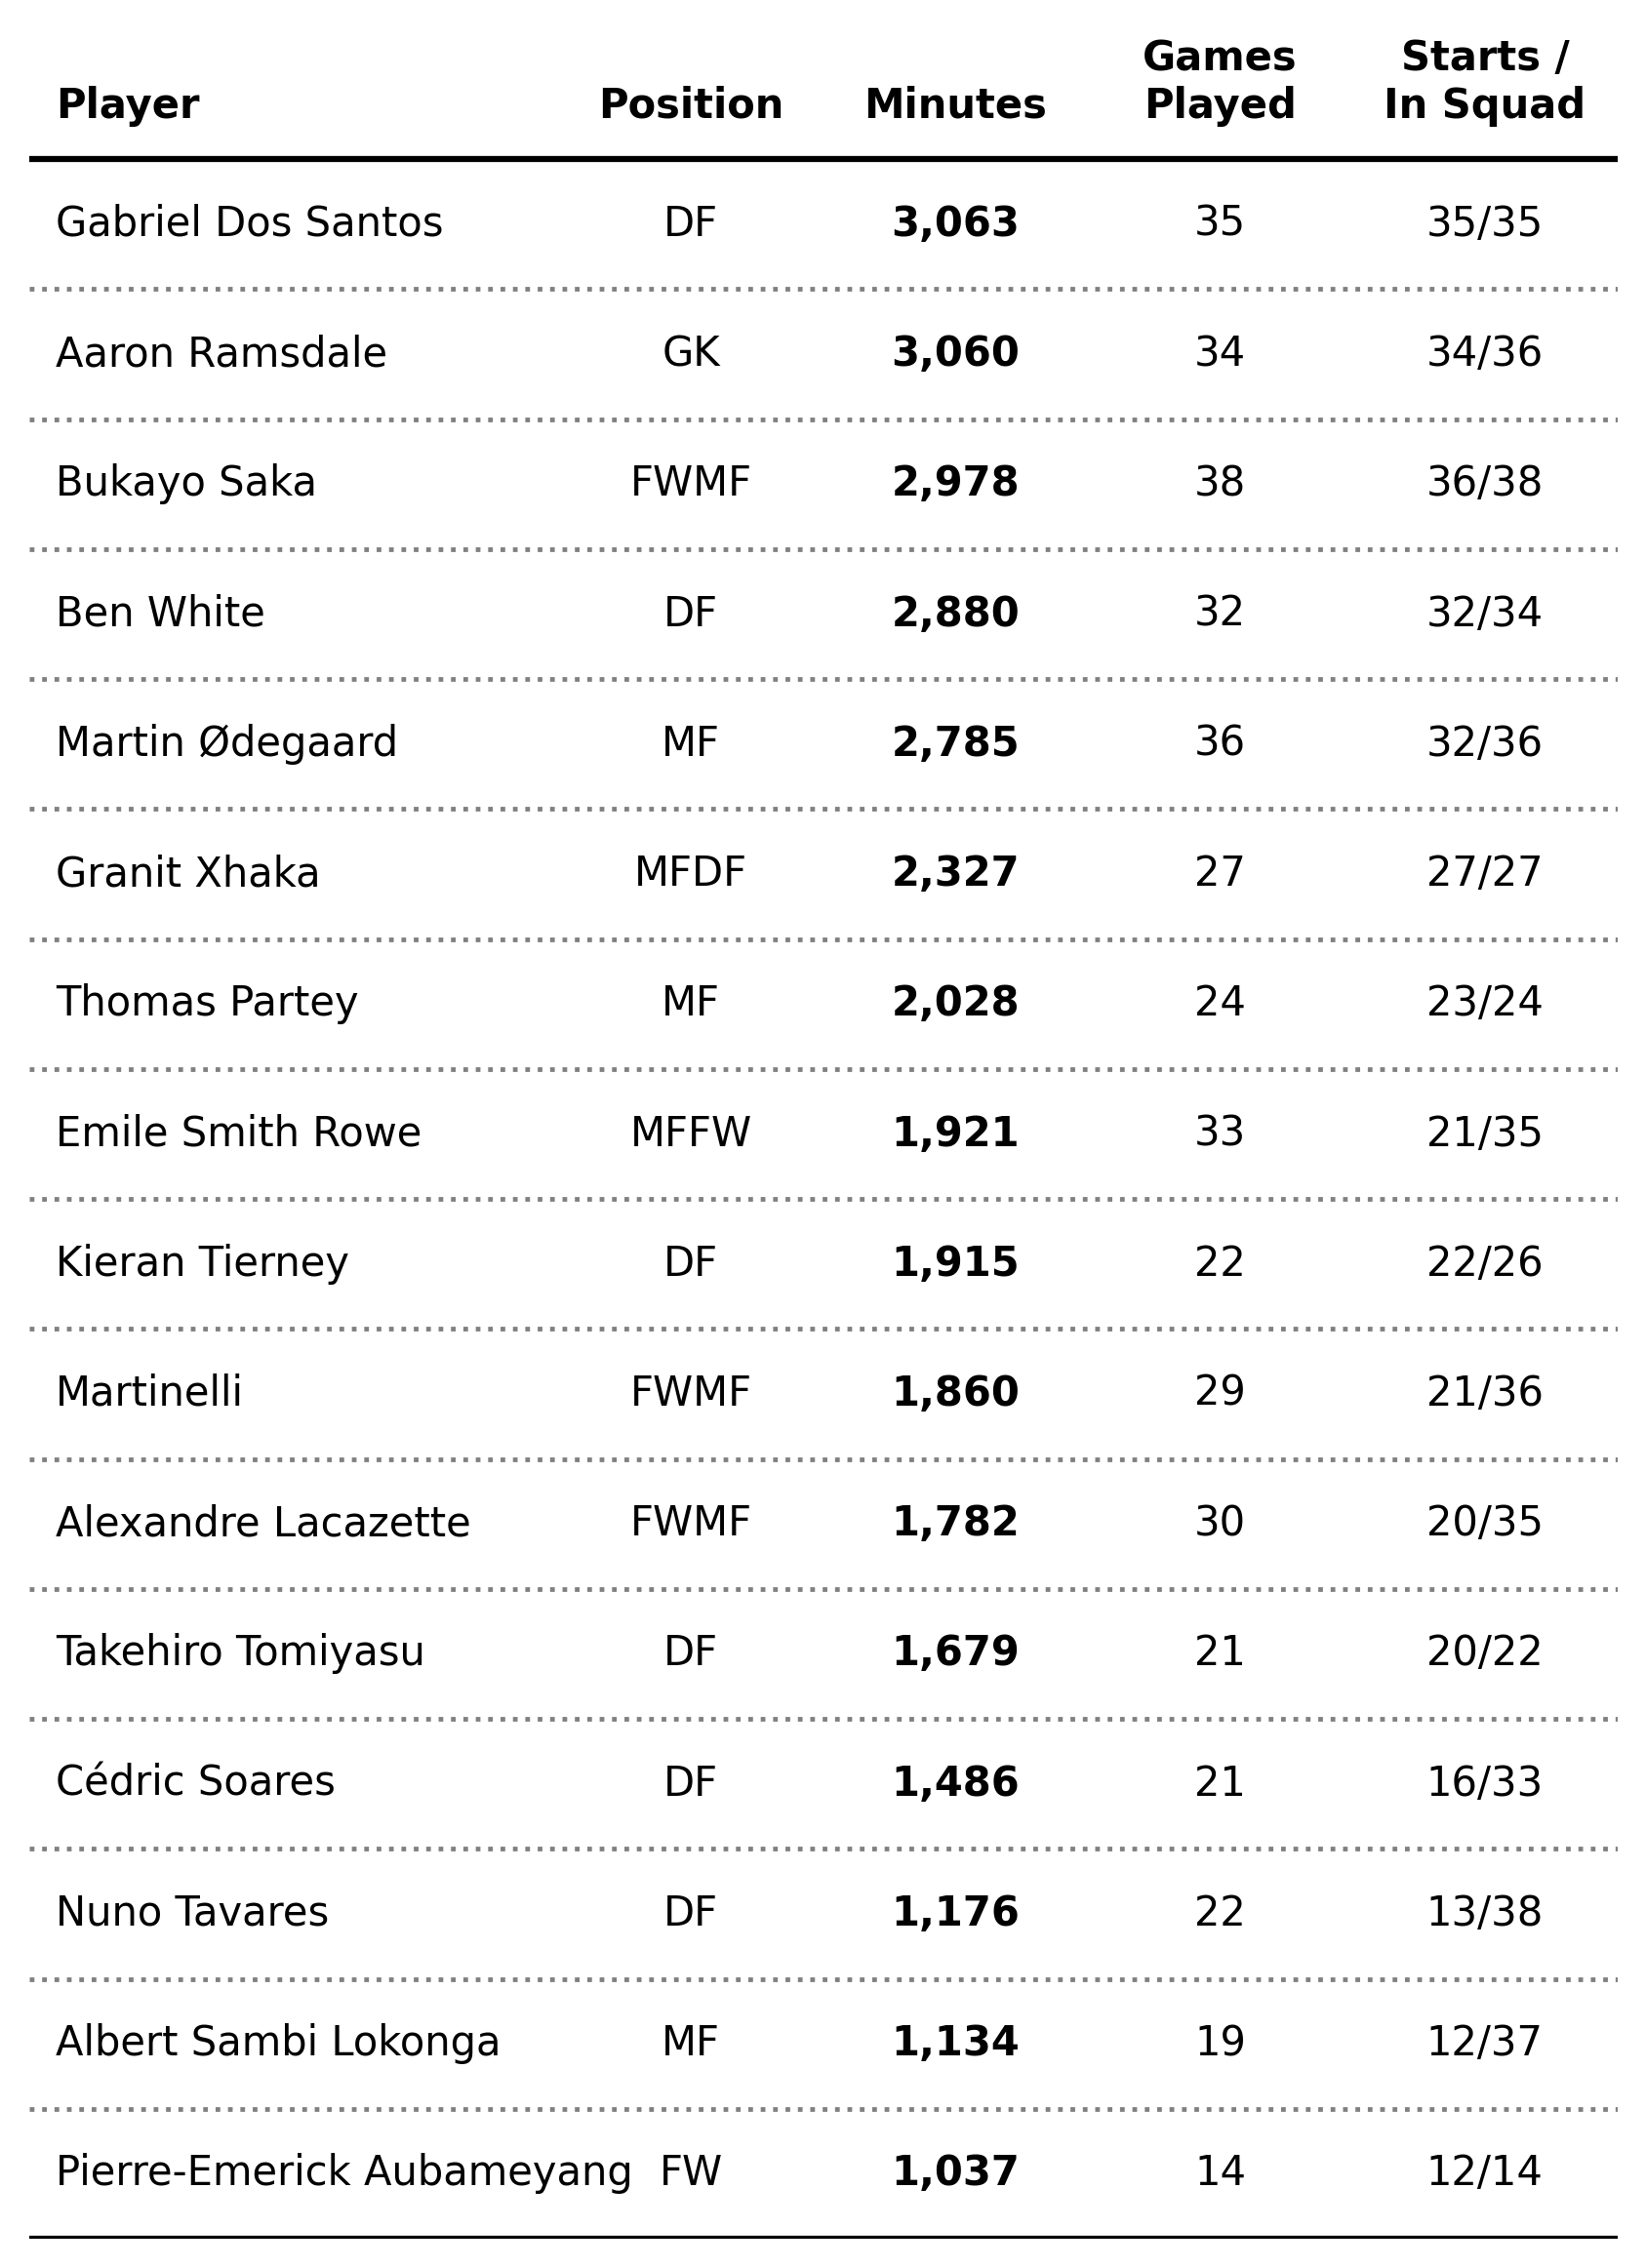

In [13]:
fig = plt.figure(figsize=(7,10), dpi=300)
ax = plt.subplot()

ncols = 5
nrows = df_1.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.10, 2.5, 3.5, 4.5, 5.5]
columns = ['Player', 'Pos', 'Min', 'MP', 'Starts_InSquad']

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        if column == 'Min':
            text_label = f'{df_1[column].iloc[i]:,.0f}'
            weight = 'bold'
        else:
            text_label = f'{df_1[column].iloc[i]}'
            weight = 'normal'
        ax.annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# Add column names
column_names = ['Player', 'Position', 'Minutes', 'Games\nPlayed', 'Starts /\nIn Squad']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.set_axis_off()
plt.savefig(
    'figures/pretty_example.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight'
)

In [14]:
df_final = df[df['Min'] >= 1000].reset_index(drop=True)
df_final = df_final[['Player', 'Nation', 'Pos', 'Min', 'MP', 'Starts', 'Subs', 'unSub']]
df_final['InSquad'] = df_final['MP'] + df_final['unSub']
df_final = df_final.sort_values(by='Min').reset_index(drop=True)
df_final = df_final[~df_final['Pos'].isna()]
df_final['Nation'] = [x.split(' ')[1].lower() for x in df_final['Nation']]
df_final['Starts_InSquad'] = [f'{x}/{y}' for x,y in zip(df_final['Starts'], df_final['InSquad'])]
df_final

,Player,Nation,Pos,Min,MP,Starts,Subs,unSub,InSquad,Starts_InSquad
0,Pierre-Emerick Aubameyang,gab,FW,1037.0,14,12,2,0,14,12/14
1,Albert Sambi Lokonga,bel,MF,1134.0,19,12,7,18,37,12/37
2,Nuno Tavares,por,DF,1176.0,22,13,9,16,38,13/38
3,Cédric Soares,por,DF,1486.0,21,16,5,12,33,16/33
4,Takehiro Tomiyasu,jpn,DF,1679.0,21,20,1,1,22,20/22
5,Alexandre Lacazette,fra,FWMF,1782.0,30,20,10,5,35,20/35
6,Martinelli,bra,FWMF,1860.0,29,21,8,7,36,21/36
7,Kieran Tierney,sco,DF,1915.0,22,22,0,4,26,22/26
8,Emile Smith Rowe,eng,MFFW,1921.0,33,21,12,2,35,21/35
9,Thomas Partey,gha,MF,2028.0,24,23,1,0,24,23/24


In [15]:
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

In [16]:
# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.25])
ax_point_2 = DC_to_NFC([2.75, 0.75])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2.25, x + .25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(df_final['Nation'].iloc[x], flag_ax)

In [17]:
def minutes_battery(minutes, ax):
    '''
    This function takes an integer and an axes and 
    plots a battery chart.
    '''
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.barh([0.5], [1], fc = 'white', ec='black', height=.35)
    ax.barh([0.5], [minutes/(90*38)], fc = '#D2042D', height=.35)
    text_ = ax.annotate(
        xy=(minutes/(90*38), .5),
        text=f'{minutes/(90*38):.0%}',
        xytext=(-8,0),
        textcoords='offset points',
        weight='bold',
        color='#EFE9E6',
        va='center',
        ha='center',
        size=5
    )
    ax.set_axis_off()
    return ax

FileNotFoundError: [Errno 2] No such file or directory: 'figures/final_table.png'

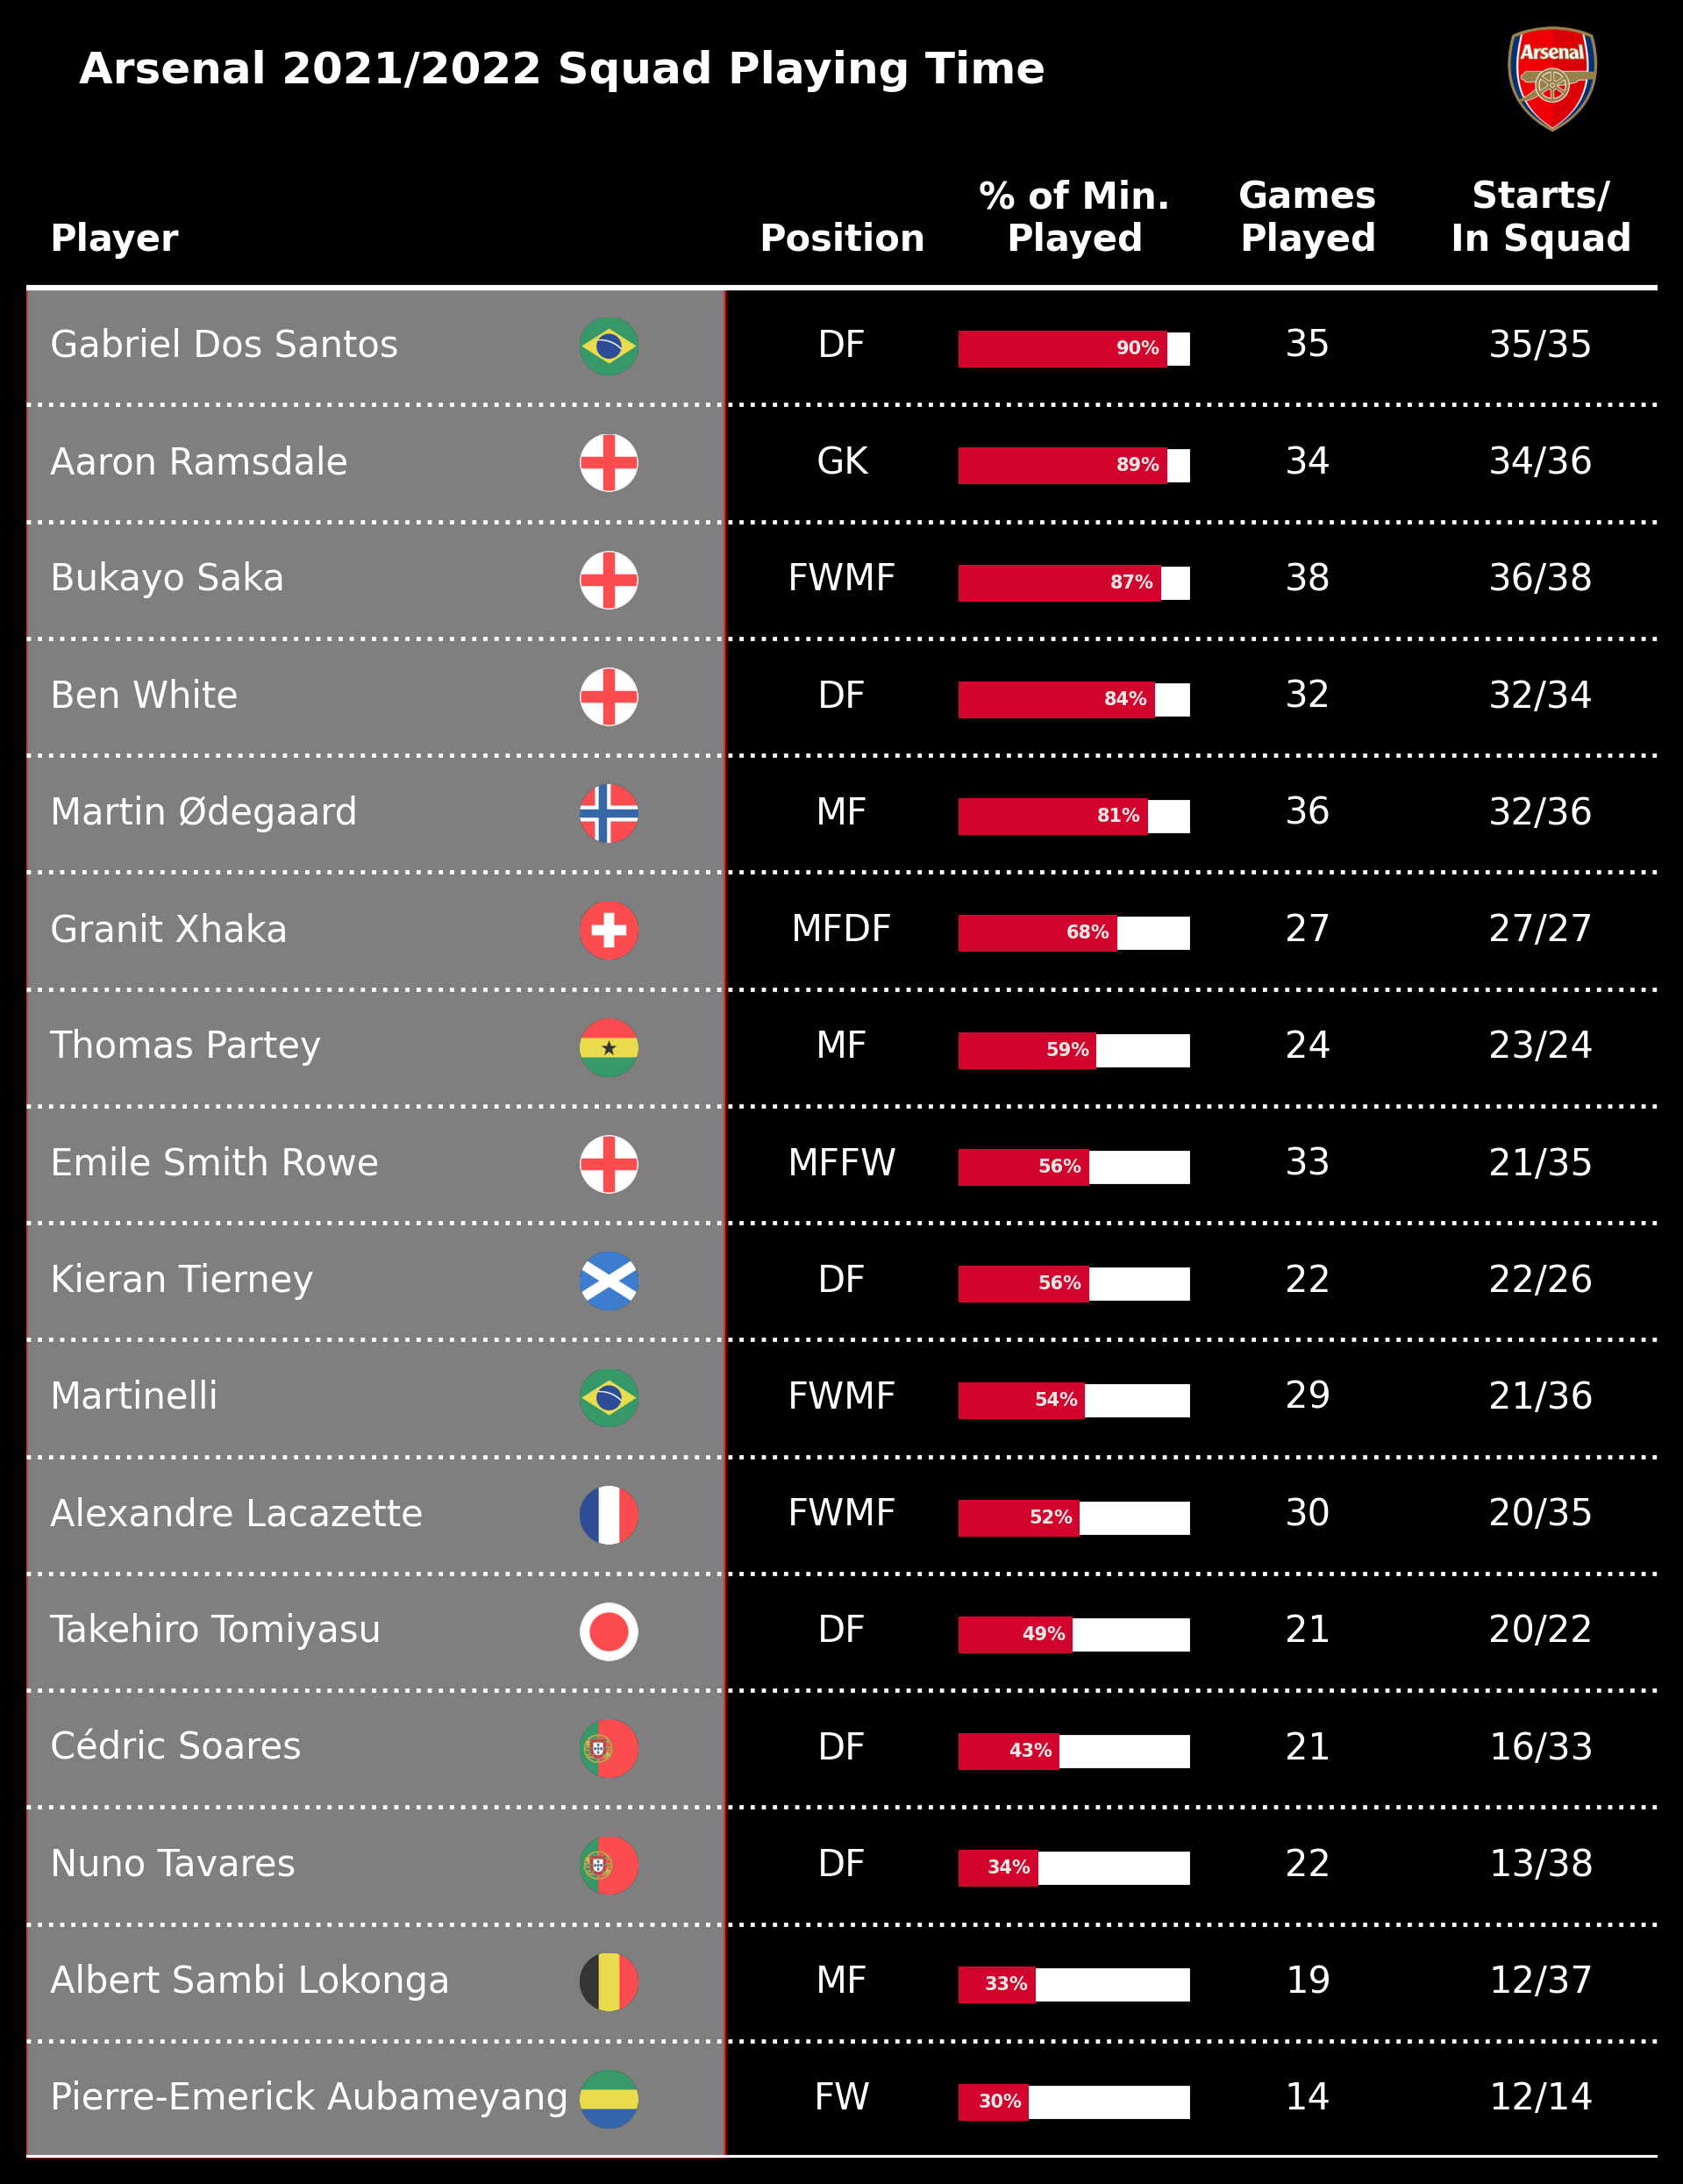

In [18]:
fig = plt.figure(figsize=(8,10), dpi=300, facecolor = 'black')
ax = plt.subplot()
mpl.rc('text', color='white')


ncols = 6
nrows = df_final.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.10, 3.5, 4.5, 5.5, 6.5]
columns = ['Player', 'Pos', 'Min', 'MP', 'Starts_InSquad']

# -- Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        if column == 'Min':
            continue
        else:
            text_label = f'{df_final[column].iloc[i]}'
            weight = 'normal'
        ax.annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.25])
ax_point_2 = DC_to_NFC([2.75, 0.75])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2.25, x + .25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(df_final['Nation'].iloc[x], flag_ax)

ax_point_1 = DC_to_NFC([4, 0.05])
ax_point_2 = DC_to_NFC([5, 0.95])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([4, x + .025])
    bar_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    minutes_battery(df_final['Min'].iloc[x], bar_ax)

# -- Add column names
column_names = ['Player', 'Position', '% of Min.\nPlayed', 'Games\nPlayed', 'Starts/\nIn Squad']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='white', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='white', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='white', ls=':', zorder=3 , marker='')

ax.fill_between(
    x=[0,3],
    y1=nrows,
    y2=0,
    color='white',
    alpha=0.5,
    ec='red'
)

ax.set_axis_off()
# -- Final details
logo_ax = fig.add_axes(
    [0.825, 0.89, .05, .05]
)
ax_logo(9825, logo_ax)
fig.text(
    x=0.15, y=.91,
    s='Arsenal 2021/2022 Squad Playing Time',
    ha='left',
    va='bottom',
    weight='bold',
    size=12
)
plt.savefig(
    'figures/final_table.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight'
)